In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
os.chdir("/content/drive/My Drive/AutoEncoders/mnist_Autoencoder/cnn AE added noise mnist")
!pwd

/content/drive/My Drive/AutoEncoders/mnist_Autoencoder/cnn AE added noise mnist


In [0]:
!ls drive

ls: cannot access 'drive': No such file or directory


In [0]:
!ls

cnn_AE_added_noise_to_mnist.ipynb


In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt            #görselleştirme kütüphanesi hem data set hem sonuöları gözlemlemek için


(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print (x_train.shape)
print (x_test.shape)
print (x_train_noisy.shape)
print (x_test_noisy.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


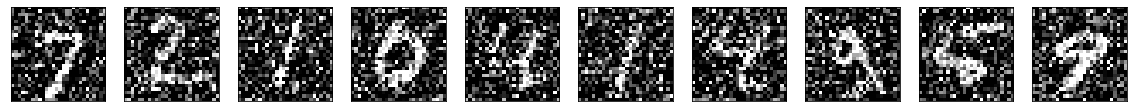

In [0]:
n= 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
!tensorboard --logdir=tmp/autoencoder

TensorBoard 1.15.0 at http://5b8e08f17386:6006/ (Press CTRL+C to quit)
^C


In [0]:
from keras.callbacks import TensorBoard
hist=autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 121us/step - loss: 0.1744 - val_loss: 0.1259

Epoch 2/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.1190 - val_loss: 0.1133
Epoch 3/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.1120 - val_loss: 0.1110
Epoch 4/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.1081 - val_loss: 0.1052
Epoch 5/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.1056 - val_loss: 0.1053
Epoch 6/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.1041 - val_loss: 0.1027
Epoch 7/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.1030 - val_loss: 0.1024
Epoch 8/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.1022 - val_loss: 0.1015
Epoch 9/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.1016 - val

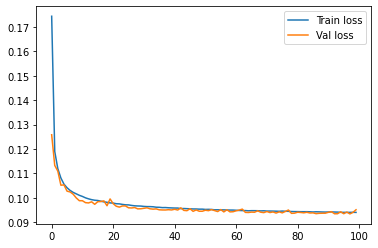

In [0]:
plt.plot(hist.history["loss"],label="Train loss")
plt.plot(hist.history["val_loss"],label="Val loss")
plt.legend()
plt.show()

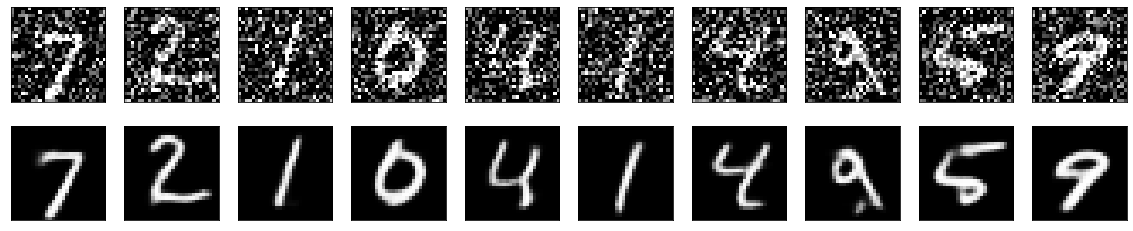

In [0]:

decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
#############################

encoded_imgs = encoded.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

AttributeError: ignored